# EDA Task 4: Categorical Analysis

## What is Categorical Analysis?
Categorical analysis is the process of exploring and summarizing variables that represent **discrete groups or labels**, such as gender, class, or region. It helps you:

- Understand the distribution of each category
- Detect imbalances or dominant classes
- Identify potential data quality issues
- Compare category-based differences in outcomes

---

## 🔧 Tools for Categorical Analysis

| Task                             | Tools / Code Example                                                |
|----------------------------------|----------------------------------------------------------------------|
| **Count categories**             | `df['var'].value_counts()`                                          |
| **Proportions**                  | `df['var'].value_counts(normalize=True)`                            |
| **Number of unique categories**  | `df['var'].nunique()`                                               |
| **List categories**              | `df['var'].unique()`                                                |
| **Bar chart**                    | `sns.countplot(x='var', data=df)`                                   |
| **Pie chart**                    | `df['var'].value_counts().plot.pie()`                               |
| **Group comparison**             | `df.groupby('category')['other_var'].mean()`                        |
| **Crosstab**                     | `pd.crosstab(df['cat1'], df['cat2'])`                               |

---

## Activity 1: Titanic Dataset — Categorical Analysis


--- SEX ---
Unique values: ['male' 'female']
Counts:
male      577
female    314
Name: sex, dtype: int64
Proportions:
male      0.647587
female    0.352413
Name: sex, dtype: float64

--- CLASS ---
Unique values: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
Counts:
Third     491
First     216
Second    184
Name: class, dtype: int64
Proportions:
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64

--- EMBARKED ---
Unique values: ['S' 'C' 'Q' nan]
Counts:
S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64
Proportions:
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64

--- ALIVE ---
Unique values: ['no' 'yes']
Counts:
no     549
yes    342
Name: alive, dtype: int64
Proportions:
no     0.616162
yes    0.383838
Name: alive, dtype: float64


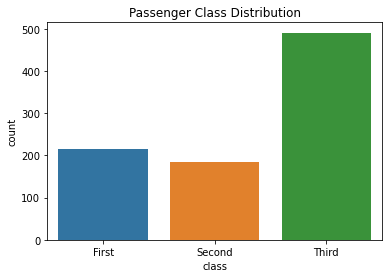

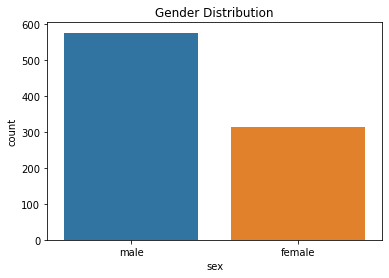

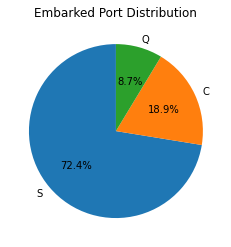


Survival rate by gender:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Survival by class:
survived         0         1
class                       
First     0.370370  0.629630
Second    0.527174  0.472826
Third     0.757637  0.242363


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df_titanic = sns.load_dataset('titanic')

# Overview of selected categorical variables
categorical_vars = ['sex', 'class', 'embarked', 'alive']
for col in categorical_vars:
    print(f"\n--- {col.upper()} ---")
    print("Unique values:", df_titanic[col].unique())
    print("Counts:")
    print(df_titanic[col].value_counts(dropna=False))
    print("Proportions:")
    print(df_titanic[col].value_counts(normalize=True, dropna=False))

# Bar chart for class
sns.countplot(x='class', data=df_titanic)
plt.title('Passenger Class Distribution')
plt.show()

# Bar chart for sex
sns.countplot(x='sex', data=df_titanic)
plt.title('Gender Distribution')
plt.show()

# Pie chart for embarked
df_titanic['embarked'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Embarked Port Distribution')
plt.ylabel('')
plt.show()

# Group-wise survival rate by sex
print("\nSurvival rate by gender:")
print(df_titanic.groupby('sex')['survived'].mean())

# Crosstab between class and survived
print("\nSurvival by class:")
print(pd.crosstab(df_titanic['class'], df_titanic['survived'], normalize='index'))

## Activity 2: Simulated Dataset — Categorical Analysis

In [ ]:
import numpy as np

# Simulate dataset
np.random.seed(0)
df_sim = pd.DataFrame({
    'age': np.random.randint(18, 80, 100),
    'income': np.random.normal(50000, 15000, 100),
    'gender': np.random.choice(['male', 'female'], size=100),
    'purchased': np.random.choice([0, 1], size=100)
})

# Overview of categorical variables
categorical_vars = ['gender', 'purchased']
for col in categorical_vars:
    print(f"\n--- {col.upper()} ---")
    print("Unique values:", df_sim[col].unique())
    print("Counts:")
    print(df_sim[col].value_counts())
    print("Proportions:")
    print(df_sim[col].value_counts(normalize=True))

# Bar chart for gender
sns.countplot(x='gender', data=df_sim)
plt.title('Gender Distribution')
plt.show()

# Bar chart for purchased
sns.countplot(x='purchased', data=df_sim)
plt.title('Purchase Outcome Distribution')
plt.show()

# Group-wise average income by gender
print("\nAverage income by gender:")
print(df_sim.groupby('gender')['income'].mean())

# Crosstab of gender vs. purchased
print("\nPurchased by gender:")
print(pd.crosstab(df_sim['gender'], df_sim['purchased'], normalize='index'))